In [1]:
''' Plot a map of TC and SD intercept (tracks) '''
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys

In [15]:
''' load TC intercept/ impact output file '''
year = '2023'
path = '/Users/chi/Documents/projects/sd-ni-wp/SD_wp_TCs/data_SD_TC-intercept/'
fn = 'SD_intercept_TCs_tracks_NA_'+year+'.txt'
# data_in = np.genfromtxt(path+fn, dtype=['<U20','f8','f8','f8','f8','f8','f8',\
#                                         '<U20','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8',\
#                                             'f8','f8','f8'], delimiter=' ',skip_header=2)
SDnums = np.genfromtxt(path+fn, delimiter=' ', skip_header=2, usecols=(0,), dtype=str)
TCnames = np.genfromtxt(path+fn, delimiter=' ', skip_header=2, usecols=(7,), dtype=str)
data_in = np.genfromtxt(path+fn, delimiter=' ', skip_header=2, usecols=(1,2,3,4,5,6,8,9,10,11,12,13,22,23,24), dtype=float)
print(data_in[0])

[ 1.69252026e+09 -6.67270208e+01  1.54530704e+01 -7.80000000e+00
 -6.63000000e+00  4.76670030e+02  1.69252560e+09 -6.29000000e+01
  1.33000000e+01 -3.00000000e+00  1.00500000e+03  2.80000000e+01
  1.60000000e+01  2.85000000e+02  1.00000000e+00]


In [16]:
### load topography data
path_topo = '/Users/chi/Documents/Data/Topography/GEBCO_23_Jan_2025/'
ds_topo = nc.Dataset(path_topo+'gebco_2024_n50.0_s5.0_w-98.0_e-30.0.nc')
# print(ds_topo)
lon_topo = ds_topo.variables['lon'][:]
lat_topo = ds_topo.variables['lat'][:]
elevation = ds_topo.variables['elevation'][:]
print(lon_topo.shape, lat_topo.shape, elevation.shape )

(16320,) (10800,) (10800, 16320)


Text(0.5, 0.98, 'TC intercept 2023: Dist to best track within 300 km')

<Figure size 432x288 with 0 Axes>

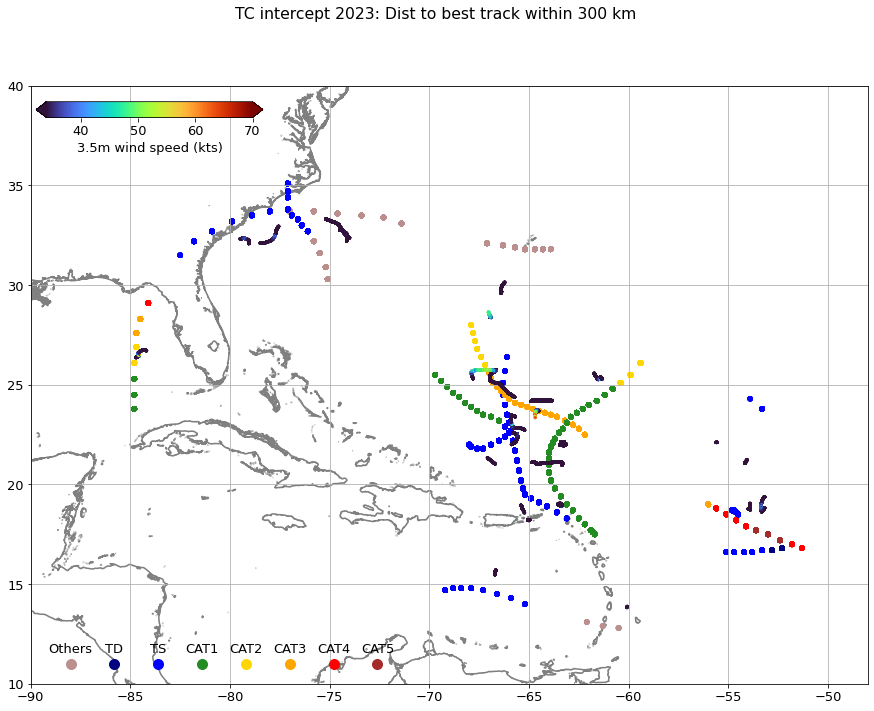

In [40]:
dist2bt_max = 300 # km
ipick = data_in[:,5]< 300
''' plot map '''
plt.clf()
plt.rcParams.update({'font.size': 13})
fig, axes = plt.subplots(1)
fig.set_size_inches(15, 11)
plt.contour(lon_topo, lat_topo, elevation, levels=[0], colors='gray',zorder=0)

''' go through the TC intercept data & plot tracks 
- color TC track by categories 
- color SD tracks by wind speed '''
cols_sshs = ['rosybrown','rosybrown','rosybrown','rosybrown','navy','blue','forestgreen','gold','orange','red','brown']
strs_sshs = ['Others','TD','TS','CAT1','CAT2','CAT3','CAT4','CAT5']
vlim = [34,70]
''' plot TC track '''
cols = [cols_sshs[int(ind+5)] for ind in data_in[ipick,9]]
plt.scatter(data_in[ipick,7],data_in[ipick,8],s=20,c=cols,zorder=1)#,edgecolors='k')
''' plot SD intercept colored by measured windspeed '''
wdsp_kts = np.sqrt( np.square(data_in[ipick,3])+np.square(data_in[ipick,4]) )*1.94384 # (kts) at SD measurement height - 3.5m
c2 = plt.scatter(data_in[ipick,1],data_in[ipick,2],s=5,c=wdsp_kts, vmin=vlim[0], vmax=vlim[1],cmap='turbo',zorder=2)
plt.xlim([-90, -48])
plt.ylim([10, 40])
plt.grid()
''' plot TC category icons '''
for i, str_sshs in enumerate(strs_sshs):
    plt.plot(-88+i*2.2, 11,'o',color=cols_sshs[i+3],ms=10)
    plt.text(-88+i*2.2, 11.4, str_sshs,color='k',ha='center',va='bottom')
''' add colorbar '''
axf = fig.add_axes([0.13,0.84,0.21,0.02])
axf = plt.colorbar(c2,orientation='horizontal',cax=axf,extend='both')
axf.ax.set_xlabel('3.5m wind speed (kts)')
''' save figure '''
plt.suptitle('TC intercept '+year+': Dist to best track within {:.0f} km'.format(dist2bt_max))
fig.savefig('map_TC-intercepts_SD-by-wdsp_'+year+'.png',dpi=400,bbox_inches='tight')